In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
import sklearn
from pandas import Series,DataFrame

In [98]:
actors = pd.read_csv("actors.csv")
actors

,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15
7,7,26,Andy (voice),52fe4284c3a36847f8024fc1,0,1116442,John Morris,7,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg,"[862, 863, 10193]",3
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25


In [99]:
movies_metadata = pd.read_csv("movies_metadata.csv")
movies_metadata

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [100]:
actors.movies[0][1]
#moviesがlistじゃなくstr

'8'

In [7]:
def make_list_from_str(string):
    if isinstance(string, str):
        result_list = eval(string)
    else:
        result_list = np.nan
    return result_list

In [102]:
#list化
actors.movies=actors.movies.map(make_list_from_str)

In [103]:
actors.movies[0][1]
#list化OK

568

In [104]:
actors_above10 = actors[actors.appearance>10]
actors_above10

,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25
10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39


In [107]:
actors_above10['budget_array']=0
actors_above10

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,0
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,0
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,0
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,0
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,0
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,0
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,0
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,0
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,0
10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,0


In [83]:
actors_above10['budget_array'][0][0]=0
actors_above10

,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[0, 568, 13, 9800, 858, 32562, 9591, 857, 1197...",72,"[0, 568, 13, 9800, 858, 32562, 9591, 857, 1197..."
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231..."
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[862, 524, 18937, 14577, 18784, 863, 11589, 39..."
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[862, 11041, 32302, 863, 18935, 10865, 26386, ..."
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ..."
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,..."
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[862, 11522, 620, 2978, 863, 11718, 40814, 825..."
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[862, 37244, 9880, 45824, 15276, 36278, 10193,..."
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12..."
10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1..."


In [114]:
actors_above10.dtypes

Unnamed: 0       int64
cast_id          int64
character       object
credit_id       object
gender           int64
id               int64
name            object
order            int64
profile_path    object
movies          object
appearance       int64
budget_array    object
dtype: object

In [111]:
actors_above10.astype({'budget_array':list}).dtypes

Unnamed: 0       int64
cast_id          int64
character       object
credit_id       object
gender           int64
id               int64
name            object
order            int64
profile_path    object
movies          object
appearance       int64
budget_array    object
dtype: object

In [113]:
actors_above10=actors_above10.astype({'budget_array':list})

In [116]:
actors_above10.budget_array[0]=[0,1]
actors_above10

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[0, 1]"
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,0
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,0
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,0
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,0
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,0
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,0
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,0
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,0
10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,0


In [117]:
actors_above10.budget_array[0][0]

0

In [118]:
buffer = []
#movies_metadata.budget[movies_metadata.id=='862'].values[0]
                       
buffer.append(int(movies_metadata.budget[movies_metadata.id=='862'].values[0]))
buffer.append(int(movies_metadata.budget[movies_metadata.id=='8844'].values[0]))

buffer

[30000000, 65000000]

In [125]:
movies_metadata.id==str(actors_above10.movies[0][0])

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
45436    False
45437    False
45438    False
45439    False
45440    False
45441    False
45442    False
45443    False
45444    False
45445    False
45446    False
45447    False
45448    False
45449    False
45450    False
45451    False
45452    False
45453    False
45454    False
45455    False
45456    False
45457    False
45458    False
45459    False
45460    False
45461    False
45462    False
45463    False
45464    False
45465    False
Name: id, Length: 45466, dtype: bool

In [126]:
movies_metadata.budget[movies_metadata.id==str(actors_above10.movies[0][0])]

0    30000000
Name: budget, dtype: object

In [127]:
movies_metadata.budget[movies_metadata.id==str(actors_above10.movies[0][0])].values[0]

'30000000'

In [128]:
for i in actors_above10.index:
    buffer=[]
    for j in range(len(actors_above10.movies[i])):
        buffer.append(int(movies_metadata.budget[movies_metadata.id==str(actors_above10.movies[i][j])].values[0]))
        actors_above10.budget_array[i]=buffer

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
actors_above10

,Unnamed: 0,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array
0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000..."
1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45..."
2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,..."
3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,..."
4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ..."
5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[30000000, 18000000, 22000000, 0, 120000000, 5..."
6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[30000000, 0, 30000000, 37000000, 90000000, 0,..."
8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[30000000, 0, 37000000, 0, 0, 6000000, 2000000..."
9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[30000000, 3600000, 0, 0, 19000000, 24000000, ..."
10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[30000000, 11000000, 33000000, 13000000, 30000..."


In [132]:
actors_above10.to_csv('actors_budget.csv')

In [3]:
actors_above10=pd.read_csv('actors_budget.csv')

In [4]:
actors_above10['budget_average']=0
actors_above10['budget_nonzero_num']=0
actors_above10.head()

,Unnamed: 0,Unnamed: 0.1,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array,budget_average,budget_nonzero_num
0,0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000...",0,0
1,1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45...",0,0
2,2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,...",0,0
3,3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,...",0,0
4,4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ...",0,0


In [5]:
actors_above10['budget_sum']=0
actors_above10

,Unnamed: 0,Unnamed: 0.1,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array,budget_average,budget_nonzero_num,budget_sum
0,0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000...",0,0,0
1,1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45...",0,0,0
2,2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,...",0,0,0
3,3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,...",0,0,0
4,4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ...",0,0,0
5,5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[30000000, 18000000, 22000000, 0, 120000000, 5...",0,0,0
6,6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[30000000, 0, 30000000, 37000000, 90000000, 0,...",0,0,0
7,8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[30000000, 0, 37000000, 0, 0, 6000000, 2000000...",0,0,0
8,9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[30000000, 3600000, 0, 0, 19000000, 24000000, ...",0,0,0
9,10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[30000000, 11000000, 33000000, 13000000, 30000...",0,0,0


In [8]:
actors_above10.budget_array=actors_above10.budget_array.map(make_list_from_str)
actors_above10.budget_array[0][0]

30000000

In [13]:
s=0
s+=actors_above10.budget_array[0][0]
s/3

10000000.0

In [15]:
actors_above10.budget_average[0]=s/3
actors_above10

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,Unnamed: 0.1,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array,budget_average,budget_nonzero_num,budget_sum
0,0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000...",10000000,0,0
1,1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45...",0,0,0
2,2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,...",0,0,0
3,3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,...",0,0,0
4,4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ...",0,0,0
5,5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[30000000, 18000000, 22000000, 0, 120000000, 5...",0,0,0
6,6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[30000000, 0, 30000000, 37000000, 90000000, 0,...",0,0,0
7,8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[30000000, 0, 37000000, 0, 0, 6000000, 2000000...",0,0,0
8,9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[30000000, 3600000, 0, 0, 19000000, 24000000, ...",0,0,0
9,10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[30000000, 11000000, 33000000, 13000000, 30000...",0,0,0


In [18]:
for i in actors_above10.index:
    s=0
    num=0
    for j in range(len(actors_above10.budget_array[i])):
        if actors_above10.budget_array[i][j]!=0:
            s+=actors_above10.budget_array[i][j]
            num+=1
    actors_above10.budget_nonzero_num[i]=num
    actors_above10.budget_sum[i]=s
    if num!=0:
        actors_above10.budget_average[i]=s/num

/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
actors_above10

,Unnamed: 0,Unnamed: 0.1,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array,budget_average,budget_nonzero_num,budget_sum
0,0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000...",54532608,46,2508500000
1,1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45...",56600000,15,849000000
2,2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,...",69333333,6,416000000
3,3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,...",49800000,5,249000000
4,4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ...",45174074,27,1219700000
5,5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[30000000, 18000000, 22000000, 0, 120000000, 5...",101310344,29,2938000000
6,6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[30000000, 0, 30000000, 37000000, 90000000, 0,...",57083333,6,342500000
7,8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[30000000, 0, 37000000, 0, 0, 6000000, 2000000...",68250000,4,273000000
8,9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[30000000, 3600000, 0, 0, 19000000, 24000000, ...",57440000,15,861600000
9,10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[30000000, 11000000, 33000000, 13000000, 30000...",36621226,21,769045760


In [21]:
actors_above10.budget_sum=actors_above10.budget_sum.replace(0,np.nan)

In [22]:
actors_above10=actors_above10.dropna(subset=['budget_sum'])
actors_above10

,Unnamed: 0,Unnamed: 0.1,cast_id,character,credit_id,gender,id,name,order,profile_path,movies,appearance,budget_array,budget_average,budget_nonzero_num,budget_sum
0,0,0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,"[862, 568, 13, 9800, 858, 32562, 9591, 857, 11...",72,"[30000000, 52000000, 55000000, 26000000, 21000...",54532608,46,2.508500e+09
1,1,1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,"[862, 11395, 9446, 10371, 863, 926, 2185, 1231...",29,"[30000000, 22000000, 0, 35000000, 90000000, 45...",56600000,15,8.490000e+08
2,2,2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,"[862, 524, 18937, 14577, 18784, 863, 11589, 39...",29,"[30000000, 52000000, 40000000, 0, 0, 90000000,...",69333333,6,4.160000e+08
3,3,3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,"[862, 11041, 32302, 863, 18935, 10865, 26386, ...",20,"[30000000, 0, 0, 90000000, 3000000, 120000000,...",49800000,5,2.490000e+08
4,4,4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,"[862, 9603, 1775, 15789, 32636, 23333, 19042, ...",75,"[30000000, 12000000, 11000000, 0, 0, 0, 0, 0, ...",45174074,27,1.219700e+09
5,5,5,19,Hamm (voice),52fe4284c3a36847f8024fa9,2,7907,John Ratzenberger,5,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg,"[862, 1891, 783, 37530, 9487, 1924, 8536, 863,...",46,"[30000000, 18000000, 22000000, 0, 120000000, 5...",101310344,29,2.938000e+09
6,6,6,20,Bo Peep (voice),52fe4284c3a36847f8024fad,1,8873,Annie Potts,6,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg,"[862, 11522, 620, 2978, 863, 11718, 40814, 825...",15,"[30000000, 0, 30000000, 37000000, 90000000, 0,...",57083333,6,3.425000e+08
7,8,8,22,Sid (voice),52fe4284c3a36847f8024fb1,2,12901,Erik von Detten,8,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg,"[862, 37244, 9880, 45824, 15276, 36278, 10193,...",11,"[30000000, 0, 37000000, 0, 0, 6000000, 2000000...",68250000,4,2.730000e+08
8,9,9,23,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1,12133,Laurie Metcalf,9,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg,"[862, 451, 26203, 38554, 10155, 4233, 9452, 12...",25,"[30000000, 3600000, 0, 0, 19000000, 24000000, ...",57440000,15,8.616000e+08
9,10,10,24,Sergeant (voice),52fe4284c3a36847f8024fb9,2,8655,R. Lee Ermey,10,/r8GBqFBjypLUP9VVqDqfZ7wYbSs.jpg,"[862, 687, 807, 4722, 10779, 28, 600, 26306, 1...",39,"[30000000, 11000000, 33000000, 13000000, 30000...",36621226,21,7.690458e+08


/Users/minori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


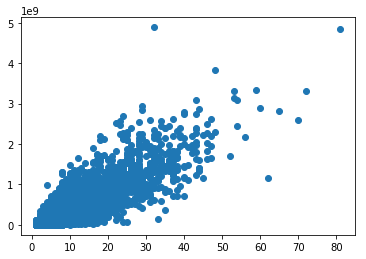

In [23]:
from pandas import *
import matplotlib.pyplot as plt

# 2 つの列から散布図をプロッティング
plt.scatter(actors_above10['budget_nonzero_num'], actors_above10['budget_sum'])

plt.show()
#plt.savefig("image.png")